<a href="https://colab.research.google.com/github/Hanif-zarei/computer-vision/blob/main/Convolutional%20Neural%20Network%20(CNN)-lenet_5%20%26%20Dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Import libraries

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten, Conv2D, AveragePooling2D
from keras import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# dividing the data into training and testing data

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# checking the shape of train dataset

x_train.shape [0]
60000

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


60000

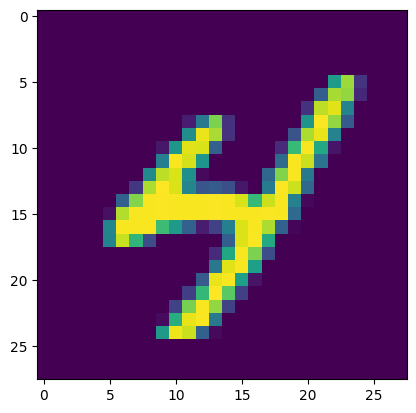

In [4]:
# Display the image at index 987 from x_train

plt.imshow(x_train[987])

In [5]:
# Print the label corresponding to the image at index 987

# This prints the label stored in y_train at index 987

y_train[987]

4

In [6]:
# Print the shape of x_train to understand dataset dimensions

x_train.shape

(60000, 28, 28)

In [7]:
# Reshape x_train to have dimensions (number of samples, 28, 28, 1)

# where 28x28 is the image size and 1 is the channel for grayscale

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Reshape x_test to have the same dimensions as x_train (number of samples, 28, 28, 1)

x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [8]:
x_train.shape

(60000, 28, 28, 1)

In [9]:
# Get the unique labels in y_train

# This will return a sorted array of unique class labels present in the y_train dataset

np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
y_train[0]

5

In [11]:
# Convert y_train and y_test labels to categorical format (one-hot encoding) with 10 classes

y_train = keras.utils.to_categorical(y_train, num_classes=10)

y_test = keras.utils.to_categorical(y_test, num_classes=10)

y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In this project, I compared two neural network architectures for classifying MNIST digits: a fully connected (dense) network and a LeNet-5 convolutional neural network.

In [12]:
# Initialize a Sequential model
model = Sequential()

# Flatten the input (28x28x1 images) into a 1D vector of size 784 (28*28*1)
model.add(Flatten(input_shape=(28,28,1)))

# Add a fully connected (Dense) layer with 64 units and ReLU activation function
# This layer accepts input vectors of size 784 (after flattening)
model.add(Dense(units = 64, activation = 'relu', input_shape = (784,)))

# Add another fully connected (Dense) layer with 64 units and ReLU activation function
model.add(Dense(units = 64, activation = 'relu'))

# Add the output layer with 10 units (for 10 classes) and softmax activation function
# This layer produces a probability distribution over the 10 classes
model.add(Dense(units = 10, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# # Display a summary of the model's architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
# Use categorical crossentropy as the loss function for multi-class classification
# Adam optimizer is used for updating the model weights
# Track accuracy as a metric to evaluate performance
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

# Train the model
# Fit the model to the training data (x_train, y_train) for 10 epochs with a batch size of 128
# Validate the model's performance using the test data (x_test, y_test)
history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

# Evaluate the model
# Assess the model's performance on the test data (x_test, y_test)
# Returns the loss and accuracy of the model on the test set
score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7046 - loss: 6.9365 - val_accuracy: 0.8711 - val_loss: 0.5964
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8872 - loss: 0.4852 - val_accuracy: 0.9041 - val_loss: 0.4269
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9227 - loss: 0.3013 - val_accuracy: 0.9243 - val_loss: 0.3211
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9364 - loss: 0.2358 - val_accuracy: 0.9277 - val_loss: 0.3025
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9457 - loss: 0.1947 - val_accuracy: 0.9375 - val_loss: 0.2569
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9551 - loss: 0.1586 - val_accuracy: 0.9419 - val_loss: 0.2383
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9595 - loss: 0.1472 - val_accuracy: 0.9432 - val_loss: 0.2472
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9595 - loss: 0.1409 - val_accuracy: 0.

In [15]:
# Initialize a Sequential model
model = Sequential()

# Add a 2D convolutional layer with 6 filters, each of size 5x5
# 'valid' padding means no padding, so the output dimensions will be reduced
# 'relu' activation function is used to introduce non-linearity
# Input shape is (28, 28, 1) for grayscale images of size 28x28
model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='valid', activation='relu', input_shape=(28, 28, 1)))

# Add an average pooling layer to down-sample the feature maps
# Pooling size is 2x2, and stride is 2
# 'valid' padding means no padding
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Add another 2D convolutional layer with 6 filters, each of size 5x5
# This layer processes the output from the previous pooling layer
model.add(Conv2D(filters=6, kernel_size=(5, 5), padding='valid', activation='relu'))

# Add another average pooling layer to down-sample the feature maps
# Pooling size is 2x2, and stride is 2
model.add(AveragePooling2D(pool_size=(2, 2), strides=2, padding='valid'))

# Flatten the 2D feature maps into a 1D vector for the dense layers
model.add(Flatten())

# Add a fully connected (Dense) layer with 30 units and 'tanh' activation function
model.add(Dense(units=30, activation='tanh'))

# Add another fully connected (Dense) layer with 15 units and 'tanh' activation function
model.add(Dense(units=15, activation='tanh'))

# Add the output layer with 10 units and 'softmax' activation function
# Each unit represents a class, and 'softmax' is used for multi-class classification
model.add(Dense(units=10, activation='softmax'))

# Print the summary of the model to display layer information and parameter counts
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 12, 12, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 8, 8, 6)             │             906 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 4, 4, 6)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 96)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 30)                  │           2,910 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,597 (17.96 KB)

 Trainable params: 4,597 (17.96 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(loss = keras.metrics.categorical_crossentropy, optimizer = keras.optimizers.Adam(), metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 128, epochs = 10, verbose = 1, validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test)

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 15s 21ms/step - accuracy: 0.4635 - loss: 1.6941 - val_accuracy: 0.8614 - val_loss: 0.5525
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8703 - loss: 0.4832 - val_accuracy: 0.9057 - val_loss: 0.3297
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9160 - loss: 0.3001 - val_accuracy: 0.9364 - val_loss: 0.2315
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9355 - loss: 0.2291 - val_accuracy: 0.9478 - val_loss: 0.1862
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9443 - loss: 0.1920 - val_accuracy: 0.9573 - val_loss: 0.1566
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9520 - loss: 0.1686 - val_accuracy: 0.9594 - val_loss: 0.1446
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9551 - loss: 0.1583 - val_accuracy: 0.9575 - val_loss: 0.1458
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9595 - loss: 0.1421 - val_accuracy: 

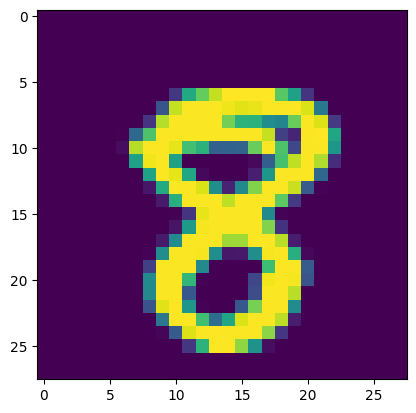

In [17]:
# tset the model
plt.imshow(x_train[23456])

In [18]:
y_train[23456]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [19]:
tf.math.argmax(model.predict(x_train[23456].reshape(1,28,28,1)), axis = 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step


<tf.Tensor: shape=(1,), dtype=int64, numpy=array([8])>